In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [ ]:
pip install plotly


In [ ]:
pip install cufflinks


In [ ]:
# Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
savukoskiKirkonkylaFileId = '1I2XUxApBflv-j7EHUOh9m_JFXicKRsAm'
climatFileId = '1xOoOGBHrC7nwrbWMVj66yneNK45LjfSc'
climatErrorFileId = '1Zvq5heJIJob1cRQ76xoTSGPejxPcXqrf'

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('Savukoski_kirkonkyla.csv')  

downloaded = drive.CreateFile({'id':climatFileId}) 
downloaded.GetContentFile('Climat_SI.csv')
downloaded.GetContentFile('Climat_SI_erreur.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('Climat_SI.csv')
train.columns[0]
train = train.rename(columns = {'Unnamed: 0':'jour'})
train.jour = train.jour.str.strip('J')
train


jour  janvier  février  mars  ...  septembre  octobre  novembre  décembre
0     1       -5     -7.0    -7  ...       16.0        6       0.0        -6
1     2       -6     -6.0    -8  ...       14.0        2       1.0        -4
2     3       -5     -5.0    -5  ...       15.0        3       2.0        -8
3     4       -3     -6.0    -3  ...       13.0        4       3.0        -9
4     5       -6     -8.0    -2  ...       12.0        3       4.0        -9
5     6      -11     -9.0     1  ...       10.0        2       3.0        -9
6     7       -6      5.0     2  ...       12.0        4       4.0        -8
7     8       -8    -11.0     1  ...       11.0        5       5.0        -4
8     9      -11    -12.0     1  ...       11.0        3       5.0        -3
9    10       -8     -9.0     2  ...       12.0        4      -1.0        -8
10   11       -8     -6.0     1  ...       10.0        2      -2.0        -9
11   12       -8     -5.0     3  ...       10.0        1      -1.0        -5
12   13       -8     -4.0     5  ...        9.0        3      -7.0        -6
13   14      -10      1.0     5  ...        9.0        3      -8.0        -7
14   15      -10      3.0     7  ...       10.0        3      -5.0       -11
15   16       -9     -9.0     3  ...       11.0        1      -3.0        -6
16   17       -6     -6.0     2  ...       10.0        4      -2.0        -8
17   18       -6     -6.0    -1  ...       10.0        6       1.0       -11
18   19       -4     -4.0    -2  ...        9.0        6       2.0        -8
19   20       -8      2.0    -1  ...       11.0        6       1.0        -8
20   21       -9      3.0     0  ...       12.0        7       0.0        -3
21   22      -14      1.0     1  ...       12.0        7       0.0        -6
22   23      -15     -3.0     2  ...       10.0        6       1.0        -8
23   24      -17     -4.0     3  ...       11.0        6       3.0        -9
24   25      -19     -6.0     4  ...       10.0        6       5.0        -5
25   26      -23     -8.0     3  ...        9.0        4      -2.0        -6
26   27       -8     -8.0     4  ...        6.0        3      -3.0        -7
27   28       -9    -11.0     5  ...        7.0        3      -6.0        -8
28   29       -5      NaN     5  ...        7.0        4      -6.0        -6
29   30       -6      NaN     3  ...        6.0        2      -4.0        -7
30   31       -7      NaN     3  ...        NaN        1       NaN        -5

[31 rows x 13 columns]

In [ ]:
#Moyenne mensuel
#Mettre dans dataframe

month_list = train.iloc[:, 1:].columns.tolist()
mean_list = {}

for month in month_list:
  mean_list[month] = train[month].mean()

# 2 versions actuellement, a voir laquelle est la plus simple a exploiter apres.

mean_df = pd.DataFrame.from_dict(mean_list.items()) # 1ere version
mean_df_2 = pd.DataFrame.from_dict(mean_list, orient='index', columns=['Moyenne']) # 2 eme version

mean_df_2

Moyenne
janvier    -8.967742
février    -4.928571
mars        1.193548
avril       8.000000
mai        12.903226
juin       17.033333
juillet    18.322581
août       17.838710
septembre  10.500000
octobre     3.870968
novembre   -0.333333
décembre   -7.000000

In [ ]:
#Ecart-type
ecartType_list = {}

for month in month_list:
  ecartType_list[month] = train[month].std()


ecartType_df = pd.DataFrame.from_dict(ecartType_list, orient='index', columns=['Ecart-Type'])

ecartType_df

Ecart-Type
janvier      4.490611
février      4.561746
mars         3.506369
avril        3.151354
mai          4.036127
juin         3.011281
juillet      3.571994
août         2.696872
septembre    2.330458
octobre      1.802627
novembre     3.717000
décembre     2.065591

In [ ]:
#Min Max
min_list = {}
max_list = {}

for month in month_list:
  min_list[month] = train[month].min()
  max_list[month] = train[month].max()



MinMax_df = pd.DataFrame.from_dict(min_list, orient='index', columns=['Min'])
tmpMax_df = pd.DataFrame.from_dict(max_list, orient='index', columns=['Max'])
MinMax_df['Max'] = tmpMax_df['Max']
MinMax_df

Min   Max
janvier   -23.0  -3.0
février   -12.0   5.0
mars       -8.0   7.0
avril       2.0  16.0
mai         5.0  18.0
juin       11.0  22.0
juillet    13.0  26.0
août       14.0  26.0
septembre   6.0  16.0
octobre     1.0   7.0
novembre   -8.0   5.0
décembre  -11.0  -3.0

In [ ]:
#Suppresion colonne inutile A revoir
#train.drop(train.columns[0], axis=1, inplace=True)


In [ ]:
#Min Max Annuel

minYear = train.min(axis=1)
maxYear = train.max(axis=1)
minMaxYear_df = pd.DataFrame(minYear, columns=['MinYear'])
tmpMaxDf = pd.DataFrame(maxYear, columns=['MaxYear'])
minMaxYear_df['MaxYear'] = tmpMaxDf['MaxYear']
minMaxYear_df

MinYear  MaxYear
0      -7.0     20.0
1      -8.0     20.0
2      -8.0     19.0
3      -9.0     18.0
4      -9.0     17.0
5     -11.0     18.0
6      -8.0     17.0
7     -11.0     17.0
8     -12.0     17.0
9      -9.0     15.0
10     -9.0     15.0
11     -8.0     16.0
12     -8.0     16.0
13    -10.0     15.0
14    -11.0     17.0
15     -9.0     18.0
16     -8.0     19.0
17    -11.0     21.0
18     -8.0     24.0
19     -8.0     21.0
20     -9.0     21.0
21    -14.0     26.0
22    -15.0     21.0
23    -17.0     24.0
24    -19.0     23.0
25    -23.0     26.0
26     -8.0     26.0
27    -11.0     21.0
28     -6.0     22.0
29     -7.0     23.0
30     -7.0     21.0

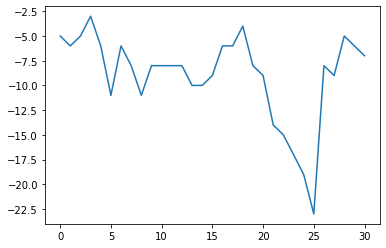

In [ ]:
#Courbe Janvier
train['janvier'].plot(kind='line')

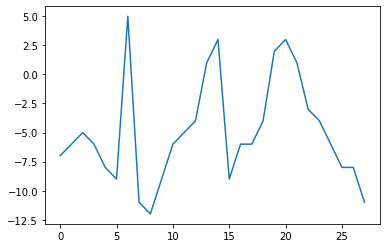

In [ ]:
#Courbe Février
train['février'].plot(kind='line')

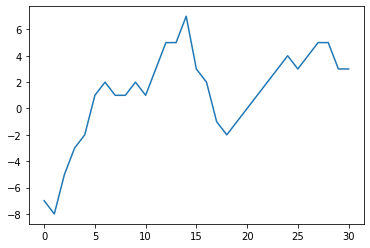

In [ ]:
#Courbe Mars
train['mars'].plot(kind='line')

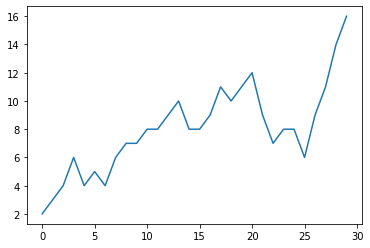

In [ ]:
#Courbe Avril
train['avril'].plot(kind='line')

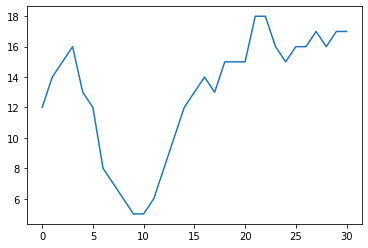

In [ ]:
#Courbe Mai
train['mai'].plot(kind='line')

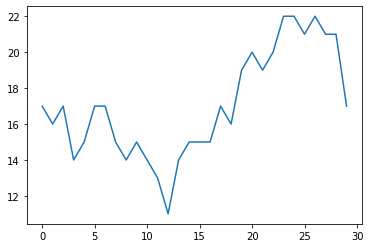

In [ ]:
#Courbe Juin
train['juin'].plot(kind='line')

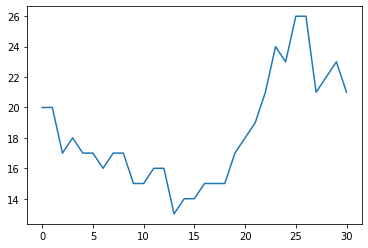

In [ ]:
#Courbe Juillet
train['juillet'].plot(kind='line')

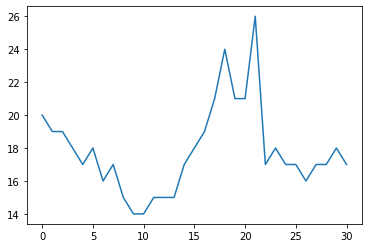

In [ ]:
#Courbe Août
train['août'].plot(kind='line')

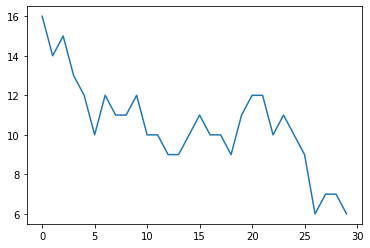

In [ ]:
#Courbe Septembre
train['septembre'].plot(kind='line')

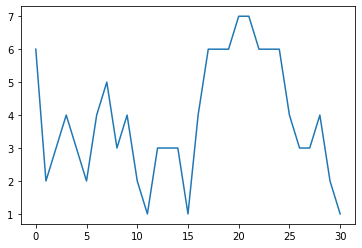

In [ ]:
#Courbe Octobre
train['octobre'].plot(kind='line')

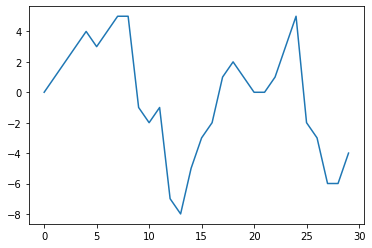

In [ ]:
#Courbe Novembre
train['novembre'].plot(kind='line')

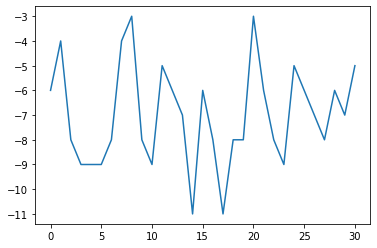

In [ ]:
#Courbe Décembre
train['décembre'].plot(kind='line')

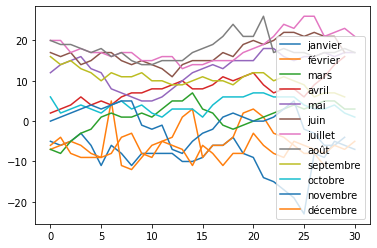

In [ ]:
#Graph 12 vue mensuels
#axis a mettre
#xlabel="Jours", ylabel="Température" A CORRIGER
train.plot()

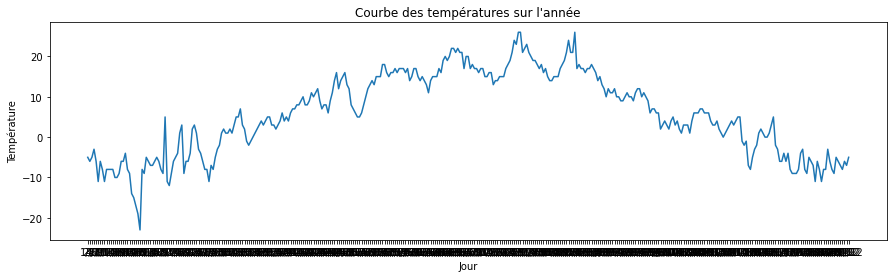

In [ ]:
x = []
y = []
for mois in train.iloc[:, 1:]:
  for jour in train['jour']:
    value = train[mois][train['jour'] == jour]
    if(not value.hasnans):
      day = jour + "/" + str(month_list.index(mois) + 1)
      x.append(day)
      y.append(value.values[0])

plt.figure(figsize=(15,4))
plt.title('Courbe des températures sur l\'année')  # Ajout d'un titre
plt.xlabel('Jour')         # Nom de la grandeur en abscisse
plt.ylabel('Température')
plt.plot(x, y)      # Tracé de la courbe
plt.show()

In [ ]:

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=x, y=y))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

fig.show()

In [ ]:
df_climat_erreur = pd.read_csv('/content/Climat_SI_erreur.csv')
df_climat_erreur

Unnamed: 0  janvier  février    mars  ...  septembre  octobre novembre décembre
0          J1       -5     -7.0      -7  ...       16.0        6      0.0       -6
1          J2       -6     -6.0      -8  ...       14.0        2      1.0       -4
2          J3       -5     -5.0      -5  ...       15.0        3      2.0       -8
3          J4       -3     -6.0      -3  ...       13.0        4      3.0       -9
4          J5       -6     -8.0      -2  ...       12.0        3      4.0       -9
5          J6      -11     -9.0       1  ...       10.0        2      3.0       -9
6          J7       -6      5.0       2  ...       12.0        4      4.0       -8
7          J8       -8    -11.0       1  ...       11.0   0xFFFF      5.0       -4
8          J9      -11    -12.0       1  ...       11.0        3      5.0       -3
9         J10       -8     -9.0       2  ...       12.0        4     -1.0       -8
10        J11       -8     -6.0       1  ...       10.0        2     -2.0       -9
11        J12       -8     -5.0       3  ...       10.0        1     -1.0       -5
12        J13       -8     -4.0       5  ...        9.0        3     -7.0       -6
13        J14      -10      1.0       5  ...        9.0        3     -8.0       -7
14        J15      -10      3.0       7  ...       10.0        3     -5.0      -11
15        J16       -9     -9.0  0xFFFF  ...       11.0        1     -3.0       -6
16        J17       -6     -6.0       2  ...       10.0        4     -2.0       -8
17        J18       -6     -6.0      -1  ...       10.0        6      1.0      -11
18        J19       -4     -4.0      -2  ...        9.0        6      2.0       -8
19        J20       -8      2.0      -1  ...       11.0        6      1.0       -8
20        J21       -9      3.0       0  ...       12.0        7      0.0      -33
21        J22      -14      1.0       1  ...       12.0        7      0.0       -6
22        J23      -15     -3.0       2  ...       10.0        6      1.0       -8
23        J24      -17     -4.0       3  ...       11.0        6      3.0       -9
24        J25      -19     -6.0       4  ...       10.0        6      5.0       -5
25        J26      -23     -8.0       3  ...        9.0        4     -2.0       -6
26        J27       -8     -8.0       4  ...        6.0        3     -3.0       -7
27        J28       -9    -11.0       5  ...        7.0        3     -6.0       -8
28        J29       -5      NaN       5  ...        7.0        4     -6.0       -6
29        J30       -6      NaN       3  ...        6.0        2     -4.0       -7
30        J31       -7      NaN       3  ...        NaN        1      NaN       -5

[31 rows x 13 columns]

In [ ]:
df_climat_erreur = df_climat_erreur.rename(columns={"Unnamed: 0": "Index"})

In [ ]:
df_climat_erreur[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']] = df_climat_erreur[['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre']].apply(pd.to_numeric, args=('coerce',))

In [ ]:
df_climat_erreur[1:] = df_climat_erreur[1:].interpolate(method='linear', limit_direction='forward', axis=0)

In [ ]:
df_climat_erreur[1:].round = df_climat_erreur[1:].round(1)

In [ ]:
df_climat_erreur

Index  janvier  février  mars  ...  septembre  octobre  novembre  décembre
0     J1       -5     -7.0  -7.0  ...       16.0      6.0       0.0        -6
1     J2       -6     -6.0  -8.0  ...       14.0      2.0       1.0        -4
2     J3       -5     -5.0  -5.0  ...       15.0      3.0       2.0        -8
3     J4       -3     -6.0  -3.0  ...       13.0      4.0       3.0        -9
4     J5       -6     -8.0  -2.0  ...       12.0      3.0       4.0        -9
5     J6      -11     -9.0   1.0  ...       10.0      2.0       3.0        -9
6     J7       -6      5.0   2.0  ...       12.0      4.0       4.0        -8
7     J8       -8    -11.0   1.0  ...       11.0      3.5       5.0        -4
8     J9      -11    -12.0   1.0  ...       11.0      3.0       5.0        -3
9    J10       -8     -9.0   2.0  ...       12.0      4.0      -1.0        -8
10   J11       -8     -6.0   1.0  ...       10.0      2.0      -2.0        -9
11   J12       -8     -5.0   3.0  ...       10.0      1.0      -1.0        -5
12   J13       -8     -4.0   5.0  ...        9.0      3.0      -7.0        -6
13   J14      -10      1.0   5.0  ...        9.0      3.0      -8.0        -7
14   J15      -10      3.0   7.0  ...       10.0      3.0      -5.0       -11
15   J16       -9     -9.0   4.5  ...       11.0      1.0      -3.0        -6
16   J17       -6     -6.0   2.0  ...       10.0      4.0      -2.0        -8
17   J18       -6     -6.0  -1.0  ...       10.0      6.0       1.0       -11
18   J19       -4     -4.0  -2.0  ...        9.0      6.0       2.0        -8
19   J20       -8      2.0  -1.0  ...       11.0      6.0       1.0        -8
20   J21       -9      3.0   0.0  ...       12.0      7.0       0.0       -33
21   J22      -14      1.0   1.0  ...       12.0      7.0       0.0        -6
22   J23      -15     -3.0   2.0  ...       10.0      6.0       1.0        -8
23   J24      -17     -4.0   3.0  ...       11.0      6.0       3.0        -9
24   J25      -19     -6.0   4.0  ...       10.0      6.0       5.0        -5
25   J26      -23     -8.0   3.0  ...        9.0      4.0      -2.0        -6
26   J27       -8     -8.0   4.0  ...        6.0      3.0      -3.0        -7
27   J28       -9    -11.0   5.0  ...        7.0      3.0      -6.0        -8
28   J29       -5    -11.0   5.0  ...        7.0      4.0      -6.0        -6
29   J30       -6    -11.0   3.0  ...        6.0      2.0      -4.0        -7
30   J31       -7    -11.0   3.0  ...        6.0      1.0      -4.0        -5

[31 rows x 13 columns]

In [ ]:
df_climat_erreur.Index = df_climat_erreur.Index.str.strip('J')

In [ ]:
mean_list_error = {}

for month in month_list:
  mean_list_error[month] = df_climat_erreur[month].mean()

# 2 versions actuellement, a voir laquelle est la plus simple a exploiter apres.

mean_df_error = pd.DataFrame.from_dict(mean_list_error.items()) # 1ere version
mean_df_error_2 = pd.DataFrame.from_dict(mean_list_error, orient='index', columns=['Moyenne']) # 2 eme version

mean_df_error_2

Moyenne
janvier    -8.967742
février    -5.516129
mars        1.241935
avril       8.258065
mai        12.903226
juin       17.000000
juillet    17.693548
août       18.838710
septembre  10.354839
octobre     3.822581
novembre   -0.451613
décembre   -7.967742

In [ ]:
#Ecart-type
ecartType_list_error = {}

for month in month_list:
  ecartType_list_error[month] = df_climat_erreur[month].std()


ecartType_df_error = pd.DataFrame.from_dict(ecartType_list_error, orient='index', columns=['Ecart-Type'])

ecartType_df_error

Ecart-Type
janvier      4.490611
février      4.696601
mars         3.542294
avril        3.415335
mai          4.036127
juin         2.988868
juillet      5.616460
août         6.044815
septembre    2.429655
octobre      1.791407
novembre     3.713388
décembre     5.029804

In [ ]:
#Min Max
min_list_error = {}
max_list_error = {}

for month in month_list:
  min_list_error[month] = train[month].min()
  max_list_error[month] = train[month].max()



MinMax_df_error = pd.DataFrame.from_dict(min_list_error, orient='index', columns=['Min'])
tmpMax_df = pd.DataFrame.from_dict(max_list_error, orient='index', columns=['Max'])
MinMax_df_error['Max'] = tmpMax_df['Max']
MinMax_df_error

Min   Max
janvier   -23.0  -3.0
février   -12.0   5.0
mars       -8.0   7.0
avril       2.0  16.0
mai         5.0  18.0
juin       11.0  22.0
juillet    13.0  26.0
août       14.0  26.0
septembre   6.0  16.0
octobre     1.0   7.0
novembre   -8.0   5.0
décembre  -11.0  -3.0

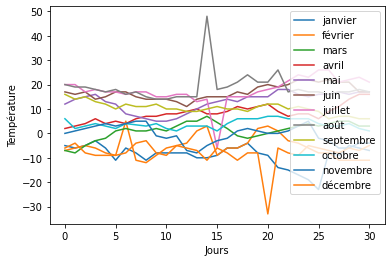

In [ ]:
df_climat_erreur.plot(xlabel="Jours", ylabel="Température")

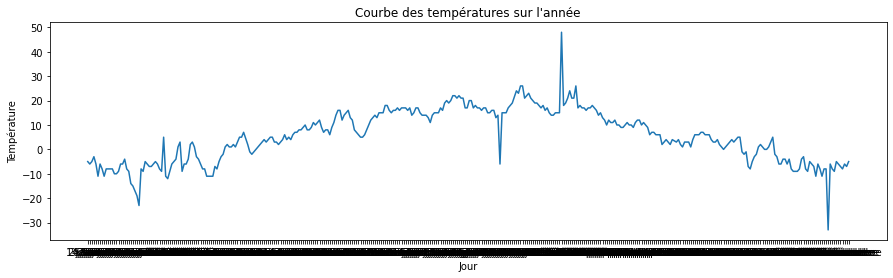

In [ ]:
x = []
y = []
for mois in df_climat_erreur.iloc[:, 1:]:
  for jour in df_climat_erreur['Index']:
    value = df_climat_erreur[mois][df_climat_erreur['Index'] == jour]
    if(not value.hasnans):
      day = jour + " " + mois
      x.append(day)
      y.append(value.values[0])

plt.figure(figsize=(15,4))
plt.title('Courbe des températures sur l\'année')  # Ajout d'un titre
plt.xlabel('Jour')         # Nom de la grandeur en abscisse
plt.ylabel('Température')
plt.plot(x, y)      # Tracé de la courbe
plt.show()

Nous nous sommes servis du site infoclimat.fr et nous avons fait une recherche sur l'année 2018 sur les capitales européenne. Nous avons ensuite fait des recherches sur les capitales ayant des températures tombant bas dans le négatif. Selon nous, Il s'agit de Moscou ou de Kiev. 

In [ ]:
# D'après le doc 